In [9]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],
axis=1)
df_cleaned.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df_cleaned.describe()
df_cleaned.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count


Survived
0    549
1    342
Name: Survived, dtype: int64

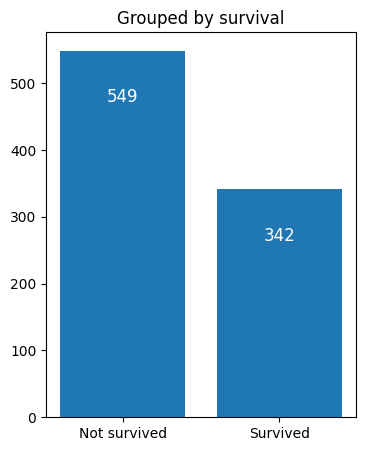

In [20]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):plt.text(i, value-70, str(value), fontsize=12, color='white',
 horizontalalignment='center', verticalalignment='center')
plt.show()


In [28]:
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

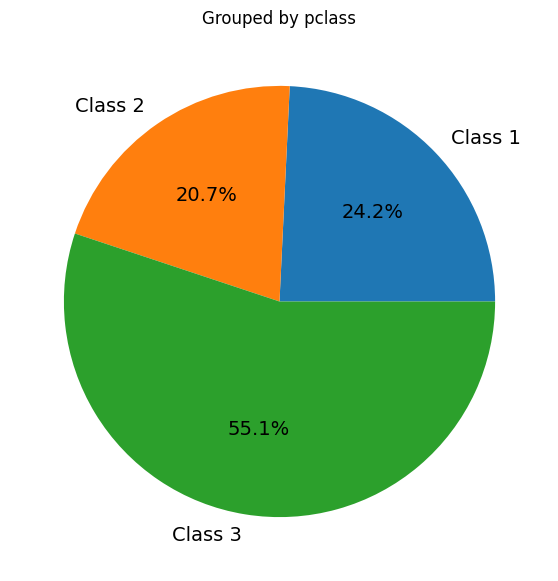

In [34]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'],
 autopct='%1.1f%%', textprops={'fontsize':14})
plt.show()

In [19]:
sex_count = df.groupby('Sex')['Sex'].count()
sex_count

Sex
female    314
male      577
Name: Sex, dtype: int64

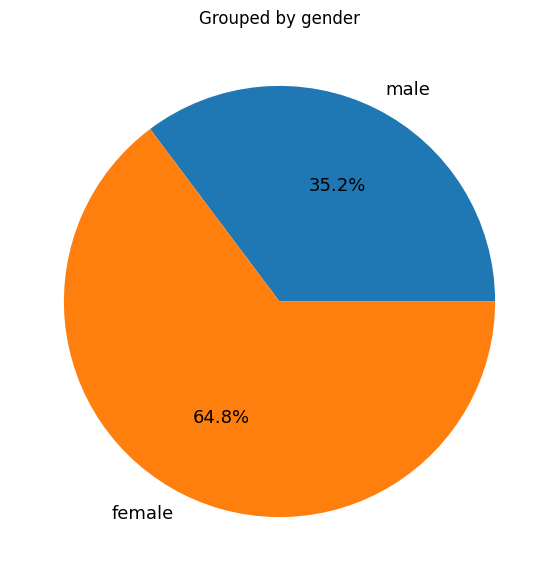

In [20]:
plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['male', 'female'],
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

In [21]:
embark_count = df.groupby('Embarked')['Embarked'].count()
embark_count


Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

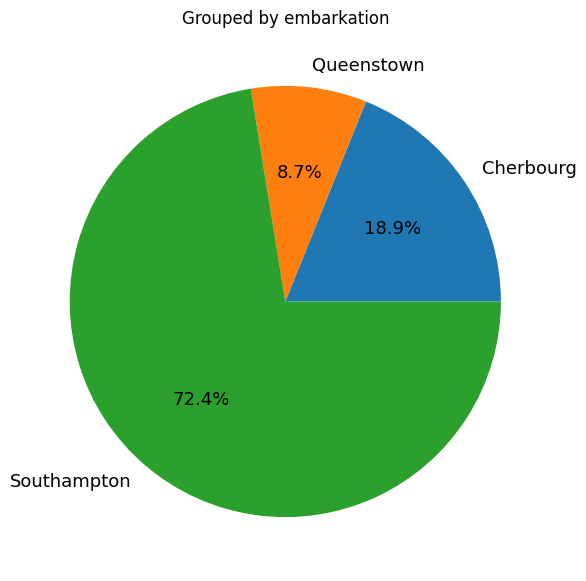

In [22]:
plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown',
'Southampton'],
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

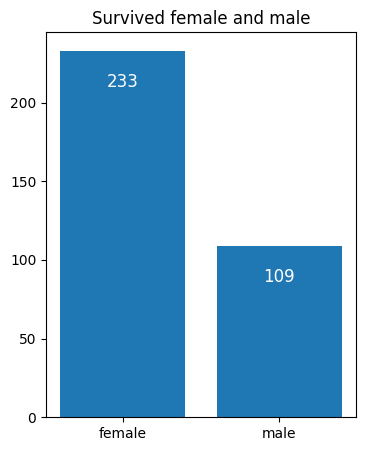

In [23]:
survived_sex = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
 plt.text(i, value-20, str(value), fontsize=12, color='white',
 horizontalalignment='center', verticalalignment='center')
plt.show()


In [24]:
grouped_by_pclass = df_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [30]:
df_cleaned.groupby(['Pclass'])['Survived'].sum()/df_cleaned.groupby(['Pclass'])['Survived'].count()*100


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64